# Data Cleaning and Preprocessing
Data preprocessing involves the transformation of the raw dataset into an understandable format. Preprocessing data is a fundamental stage in data mining to improve data efficiency. The data preprocessing methods directly affect the outcomes of any analytic algorithm.
### 1. Data overview
######    1.1 Import dataset and libraries
    The dataset has been collected from https://data.world/datafiniti/consumer-reviews-of-amazon-products website and is a .csv file with the size of 365.82 MB. This is a list of over 1,500 consumer reviews for Amazon products like the Kindle, Fire TV Stick, and more provided by Datafiniti's Product Database. The dataset includes basic product information, rating, review text, and more for each product.
######    1.2 Check missing values
    Check and remove all rows that contain missing values to avoid classification or regression error.
### 2. Text preprocessing
######    2.1 Remove none text and special character
        Text data might include website link, hashtags etc… These things better be removed from the text before we run the model.
######    2.2 Convert all text to lowercase
        To avoid the mistake during the training that the word like “We” and “we” might get learn differently, we turn all words with capital letter into lower cases.
######    2.3 Tokenization
        One sentence consists of many words, but not all words are important. To analyze each word, we need to split words into single word for each sentence.
######    2.4 Remove stopword
        Stopwords are words such as ‘I’, ‘we’, ‘my’, ‘you’, ‘own’, ‘only’ etc… These words are not likely to represent particular meaning. The model might consider this as noise, so we remove it as to keep noise level down.
######    2.5 Lemmatization vs. Stemming
        Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. In contrast to stemming, lemmatization looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words.

In [1]:
# General packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot

In [3]:
# NLP packages
import nltk 
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords

### Importing Data

In [4]:
# Reading data from .csv file
Reviews = pd.read_csv('DatafinitiElectronicsProductData.csv')

In [5]:
Reviews.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


### Data Exploration

In [6]:
Reviews.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7299 non-null   object 
 1   asins                7299 non-null   object 
 2   brand                7299 non-null   object 
 3   categories           7299 non-null   object 
 4   colors               5280 non-null   object 
 5   dateAdded            7299 non-null   object 
 6   dateUpdated          7299 non-null   object 
 7   dimension            6090 non-null   object 
 8   ean                  2951 non-null   float64
 9   imageURLs            7299 non-null   object 
 10  keys                 7299 non-null   object 
 11  manufacturer         4632 non-null   object 
 12  manufacturerNumber   7299 non-null   object 
 13  name                 7299 non-null   object 
 14  primaryCategories    7299 non-null   object 
 15  reviews.date         7238 non-null   o

In [7]:
display(Reviews.describe().round(2))

,ean,reviews.numHelpful,reviews.rating,upc
count,2.951000e+03,5813.00,7135.00,7.299000e+03
mean,2.986492e+11,0.75,4.37,3.866713e+11
std,3.385510e+11,3.42,1.04,3.681693e+11
min,2.710811e+10,0.00,1.00,1.781766e+10
25%,9.785510e+10,0.00,4.00,5.003633e+10
50%,9.785510e+10,0.00,5.00,9.785510e+10
75%,6.490000e+11,0.00,5.00,7.930000e+11
max,8.900000e+11,128.00,5.00,8.900000e+11


### Checking Missing Values

In [8]:
Reviews.isnull().any()

id                     False
asins                  False
brand                  False
categories             False
colors                  True
dateAdded              False
dateUpdated            False
dimension               True
ean                     True
imageURLs              False
keys                   False
manufacturer            True
manufacturerNumber     False
name                   False
primaryCategories      False
reviews.date            True
reviews.dateSeen       False
reviews.doRecommend     True
reviews.numHelpful      True
reviews.rating          True
reviews.sourceURLs     False
reviews.text            True
reviews.title           True
reviews.username       False
sourceURLs             False
upc                    False
weight                 False
dtype: bool

In [9]:
Reviews.isnull().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                 2019
dateAdded                 0
dateUpdated               0
dimension              1209
ean                    4348
imageURLs                 0
keys                      0
manufacturer           2667
manufacturerNumber        0
name                      0
primaryCategories         0
reviews.date             61
reviews.dateSeen          0
reviews.doRecommend    1391
reviews.numHelpful     1486
reviews.rating          164
reviews.sourceURLs        0
reviews.text              5
reviews.title             4
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
dtype: int64

In [10]:
# replace missing values with zero
Reviews['reviews.numHelpful'] = Reviews['reviews.numHelpful'].fillna(0)
Reviews['reviews.rating'] = Reviews['reviews.rating'].fillna(0)

In [11]:
Reviews.isna().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                 2019
dateAdded                 0
dateUpdated               0
dimension              1209
ean                    4348
imageURLs                 0
keys                      0
manufacturer           2667
manufacturerNumber        0
name                      0
primaryCategories         0
reviews.date             61
reviews.dateSeen          0
reviews.doRecommend    1391
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              5
reviews.title             4
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
dtype: int64

In [12]:
# Drop null values of unnecessary columns
Reviews.dropna(how = 'any', inplace = True)

In [13]:
Reviews.isnull().sum()

id                     0
asins                  0
brand                  0
categories             0
colors                 0
dateAdded              0
dateUpdated            0
dimension              0
ean                    0
imageURLs              0
keys                   0
manufacturer           0
manufacturerNumber     0
name                   0
primaryCategories      0
reviews.date           0
reviews.dateSeen       0
reviews.doRecommend    0
reviews.numHelpful     0
reviews.rating         0
reviews.sourceURLs     0
reviews.text           0
reviews.title          0
reviews.username       0
sourceURLs             0
upc                    0
weight                 0
dtype: int64

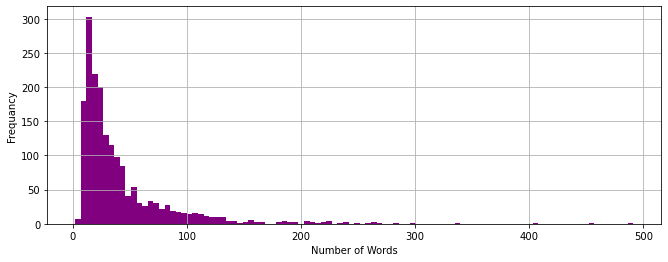

In [14]:
# Getting the number of words by splitting them by a space
numof_words_per_review = Reviews['reviews.text'].apply(lambda x: len(x.split(" ")))
numof_words_per_review.hist(bins=100, color='Purple', figsize=(11, 4))
plt.xlabel('Number of Words')
plt.ylabel('Frequancy')
plt.show() 

In [15]:
print('Average words:', numof_words_per_review.mean())
print('Skewness:', numof_words_per_review.skew())

Average words: 41.13055555555555
Skewness: 3.5032595217548295


In [16]:
Reviews['reviews.rating'].value_counts()

5.0    1102
4.0     469
3.0     114
2.0      58
1.0      57
Name: reviews.rating, dtype: int64

In [17]:
# calculating the rating percentage
rating_percentVal = 100* Reviews['reviews.rating'].value_counts()/len(Reviews)
rating_percentVal

5.0    61.222222
4.0    26.055556
3.0     6.333333
2.0     3.222222
1.0     3.166667
Name: reviews.rating, dtype: float64

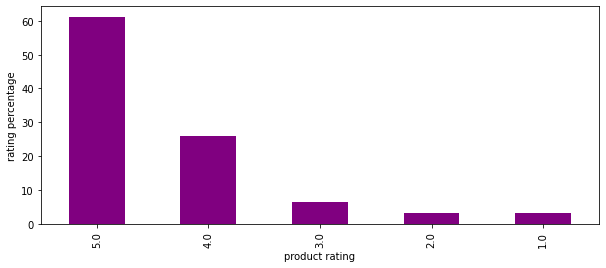

In [18]:
rating_percentVal.plot.bar(figsize=(10,4),color='Purple')
plt.xlabel('product rating')
plt.ylabel('rating percentage')
plt.show()

### Pre processing 

In [19]:
# Converting all words into lower case
Reviews['lowercase_text_reviews'] = Reviews['reviews.text'].str.lower()
print(Reviews['lowercase_text_reviews'])

0       this keyboard is very easy to type on, but the...
1       it's thin and light. i can type pretty easily ...
2       i love the new design the keys are spaced well...
3       attached easily and firmly. has a nice feel. a...
4       our original keyboard was okay, but did not ha...
                              ...                        
7287    best feature is being rechargableworks nice, t...
7288    i'm still trying to learn all the features of ...
7289     great sound system would definitely recommend...
7290    i hated my cable company bulky remote control ...
7291    we were forced to add a cable box as charter c...
Name: lowercase_text_reviews, Length: 1800, dtype: object


In [20]:
# Count unique words that are found in reviews
from nltk import word_tokenize

In [21]:
# Number of tokens before converting reviews to lowercase
token_lists = [word_tokenize(each) for each in Reviews['reviews.text']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

# Number of tokens after converting reviews to lowercase
token_lists_lower = [word_tokenize(each) for each in Reviews['lowercase_text_reviews']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))

Number of unique tokens then:  5715
Number of unique tokens now:  4856


In [22]:
# removing special characters
remove_spl_chars = Reviews['lowercase_text_reviews'].apply(lambda review: [char for char in list(review) if not char.isalnum() and char != ' '])
flat_list = [item for sublist in remove_spl_chars for item in sublist]
 
# Create a set containing special characters
set(flat_list)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '=',
 '?',
 '@',
 ']',
 '~',
 '–',
 '’',
 '…'}

In [23]:
Review2 = Reviews ['lowercase_text_reviews'].copy()
Reviews['lowercase_text_reviews'] = Reviews['lowercase_text_reviews'].str.replace(r'[^A-Za-z0-9 ]+', ' ')

<ipython-input-23-ec3d2bbc55a6>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [24]:
token_lists = [word_tokenize(each) for each in Review2]

tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

token_lists = [word_tokenize(each) for each in Reviews['lowercase_text_reviews']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens now: ",len(set(tokens)))

Number of unique tokens then:  4856
Number of unique tokens now:  4464


In [25]:
print('All Languages in NLTK: \n')
print(stopwords.fileids())

All Languages in NLTK: 

['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [26]:
# clean noise words
noise_words = []
eng_stop_words = set(stopwords.words('english'))
eng_stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [27]:
to_delete = ["no","nor","aren't",'couldn',"couldn't",'didn',"didn't",'doesn',
            "doesn't",'don',"don't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',
             "isn't",'mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",'no','not', "shan't",
            'shan',"shan't",'shouldn',"shouldn't","that'll",'wasn',"wasn't",'weren',"weren't","won't",
            'wouldn',"wouldn't"]
eng_stop_words.difference_update(to_delete)


In [28]:
# seperating stopwords and non-stopwords from the reviews
stop_words = set(eng_stop_words)
del_stop_words = []
stopword = []

# using review number 0 as an example
sentence = Reviews['lowercase_text_reviews'][2847] 

# tokenize a sentence to the seperate tokens
words = nltk.word_tokenize(sentence)

# Adding words into different array, stopwords and without stopwords(del_stop_words)
for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        del_stop_words.append(word)
        
print('-- Original Sentence --\n', sentence)
print('\n-- Stopwords in the sentence --\n', stopword)
print('\n-- Non-stopwords in the sentence --\n', del_stop_words)

-- Original Sentence --
 alpine is not as good as they used to be  definitely needs to step up their game

-- Stopwords in the sentence --
 ['is', 'as', 'as', 'they', 'to', 'be', 'to', 'up', 'their']

-- Non-stopwords in the sentence --
 ['alpine', 'not', 'good', 'used', 'definitely', 'needs', 'step', 'game']


In [29]:
# Removing these words to give more focus to the important information

def remove_stopwords(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

Reviews['withoutstop_reviews_text'] = Reviews['lowercase_text_reviews'].apply(lambda row: remove_stopwords(stop_words, row))
Reviews[['lowercase_text_reviews','withoutstop_reviews_text']]

,lowercase_text_reviews,withoutstop_reviews_text
0,this keyboard is very easy to type on but the...,"[keyboard, easy, type, fingerprint, reader, be..."
1,it s thin and light i can type pretty easily ...,"[thin, light, type, pretty, easily]"
2,i love the new design the keys are spaced well...,"[love, new, design, keys, spaced, well, no, mi..."
3,attached easily and firmly has a nice feel a...,"[attached, easily, firmly, nice, feel, must, s..."
4,our original keyboard was okay but did not ha...,"[original, keyboard, okay, not, laptop, feel, ..."
...,...,...
7287,best feature is being rechargableworks nice t...,"[best, feature, rechargableworks, nice, touch,..."
7288,i m still trying to learn all the features of ...,"[still, trying, learn, features, controller, t..."
7289,great sound system would definitely recommend,"[great, sound, system, would, definitely, reco..."
7290,i hated my cable company bulky remote control ...,"[hated, cable, company, bulky, remote, control..."


### Stemming & lemmatization

In [30]:
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lingzhang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
# defining stemSentence() function to do data stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

Reviews['stemmed_reviews_text'] = Reviews['withoutstop_reviews_text'].apply(lambda x: [stemSentence(y) for y in x])
Reviews[['withoutstop_reviews_text','stemmed_reviews_text']]

,withoutstop_reviews_text,stemmed_reviews_text
0,"[keyboard, easy, type, fingerprint, reader, be...","[keyboard , easi , type , fingerprint , reader..."
1,"[thin, light, type, pretty, easily]","[thin , light , type , pretti , easili ]"
2,"[love, new, design, keys, spaced, well, no, mi...","[love , new , design , key , space , well , no..."
3,"[attached, easily, firmly, nice, feel, must, s...","[attach , easili , firmli , nice , feel , must..."
4,"[original, keyboard, okay, not, laptop, feel, ...","[origin , keyboard , okay , not , laptop , fee..."
...,...,...
7287,"[best, feature, rechargableworks, nice, touch,...","[best , featur , rechargablework , nice , touc..."
7288,"[still, trying, learn, features, controller, t...","[still , tri , learn , featur , control , thin..."
7289,"[great, sound, system, would, definitely, reco...","[great , sound , system , would , definit , re..."
7290,"[hated, cable, company, bulky, remote, control...","[hate , cabl , compani , bulki , remot , contr..."


In [32]:
# defining lemmSentence() function to do data lemmatization 
def lemmSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(lemmatizer.lemmatize(word, pos="v"))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

Reviews['lemma_reviews_text'] = Reviews['withoutstop_reviews_text'].apply(lambda x: [lemmSentence(y) for y in x])
Reviews[['stemmed_reviews_text','lemma_reviews_text']]

,stemmed_reviews_text,lemma_reviews_text
0,"[keyboard , easi , type , fingerprint , reader...","[keyboard , easy , type , fingerprint , reader..."
1,"[thin , light , type , pretti , easili ]","[thin , light , type , pretty , easily ]"
2,"[love , new , design , key , space , well , no...","[love , new , design , key , space , well , no..."
3,"[attach , easili , firmli , nice , feel , must...","[attach , easily , firmly , nice , feel , must..."
4,"[origin , keyboard , okay , not , laptop , fee...","[original , keyboard , okay , not , laptop , f..."
...,...,...
7287,"[best , featur , rechargablework , nice , touc...","[best , feature , rechargableworks , nice , to..."
7288,"[still , tri , learn , featur , control , thin...","[still , try , learn , feature , controller , ..."
7289,"[great , sound , system , would , definit , re...","[great , sound , system , would , definitely ,..."
7290,"[hate , cabl , compani , bulki , remot , contr...","[hat , cable , company , bulky , remote , cont..."


In [33]:
Reviews.to_csv('Pre-processing_DatafinitiElectronicsProductData')